In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import models, layers, datasets
import cv2
import imghdr
from matplotlib import pyplot as plt

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [3]:
tf.config.list_physical_devices('GPU')

[]

In [4]:
data_dir= 'train'

In [5]:
os.listdir(os.path.join(data_dir, 'alpha'))

['1.png',
 '1.png_inverted.png',
 '10.png',
 '10.png_inverted.png',
 '100.png',
 '100.png_inverted.png',
 '100modified.png',
 '101.png',
 '101.png_inverted.png',
 '101modified.png',
 '102.png',
 '102.png_inverted.png',
 '102modified.png',
 '103.png',
 '103.png_inverted.png',
 '103modified.png',
 '104.png',
 '104.png_inverted.png',
 '104modified.png',
 '105.png',
 '105.png_inverted.png',
 '105modified.png',
 '106.png',
 '106.png_inverted.png',
 '106modified.png',
 '107.png',
 '107.png_inverted.png',
 '107modified.png',
 '108.png',
 '108.png_inverted.png',
 '108modified.png',
 '109.png',
 '109.png_inverted.png',
 '109modified.png',
 '10modified.png',
 '11.png',
 '11.png_inverted.png',
 '110.png',
 '110.png_inverted.png',
 '110modified.png',
 '111.png',
 '111.png_inverted.png',
 '111modified.png',
 '112.png',
 '112.png_inverted.png',
 '112modified.png',
 '113.png',
 '113.png_inverted.png',
 '113modified.png',
 '114.png',
 '114.png_inverted.png',
 '114modified.png',
 '115.png',
 '115.png_i

In [6]:
image_exts = ['jpeg', 'jpg', 'png']

In [12]:
img = cv2.imread(os.path.join('train', 'alpha', '2.png_inverted.png'))

In [14]:
img.shape

(1142, 1022, 3)

In [ ]:
"""for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('issue'.format(image_path))"""

"for image_class in os.listdir(data_dir):\n    for image in os.listdir(os.path.join(data_dir, image_class)):\n        image_path = os.path.join(data_dir, image_class, image)\n        try:\n            img = cv2.imread(image_path)\n            tip = imghdr.what(image_path)\n            if tip not in image_exts:\n                print('image not in ext list {}'.format(image_path))\n                os.remove(image_path)\n        except Exception as e:\n            print('issue'.format(image_path))"

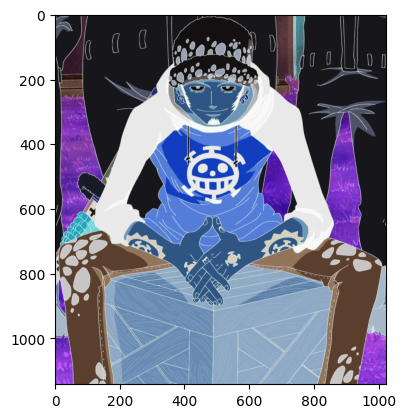

In [15]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [16]:
train = tf.keras.utils.image_dataset_from_directory('train')

Found 1305 files belonging to 2 classes.


In [17]:
train_it = train.as_numpy_iterator()

In [18]:
batch = train_it.next()

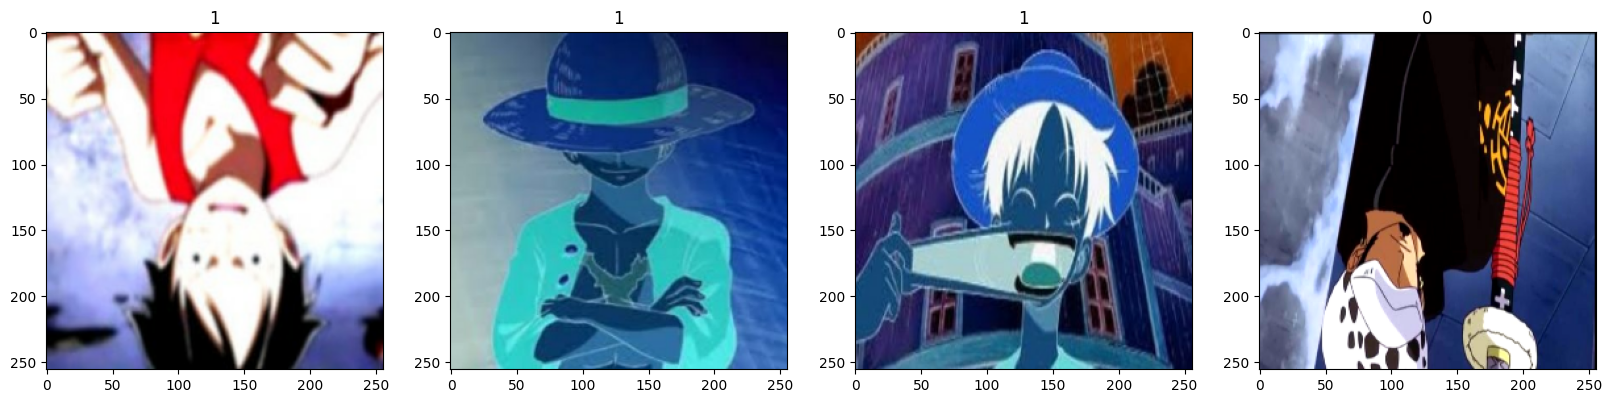

In [19]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [20]:
scaled = batch[0]/255

In [21]:
train = train.map(lambda x,y: (x/255, y))

In [22]:
scaled_it = train.as_numpy_iterator()
scaled_it.next()[0].max()

1.0

In [23]:
train_size = int(len(train)*0.8)
vals_size = int(len(train)*0.1)
test_size = int(len(train)*1)

In [24]:
vals_size

4

In [25]:
trainer = train.take(train_size)
val = train.skip(train_size).take(vals_size)
test = train.skip(train_size+vals_size).take(test_size)

In [26]:
len(test)

5

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [28]:
model = Sequential()

In [29]:
model.add(Conv2D(16,(3,3), 1, activation = 'relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))


In [30]:
model.compile(optimizer='adam', loss =  tf.losses.BinaryCrossentropy(), metrics = ['accuracy'])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [32]:
logdir = 'logs'

In [33]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [34]:
# Assuming 'val' is your validation dataset
for batch in val:
    print("Shape of input batch:", batch[0].shape)
    print("Shape of target batch:", batch[1].shape)
    break  # Print the shape of the first batch only


Shape of input batch: (32, 256, 256, 3)
Shape of target batch: (32,)


In [35]:
hist = model.fit(trainer, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
32/32 [==============================] - 21s 619ms/step - loss: 0.8982 - accuracy: 0.5576 - val_loss: 0.6187 - val_accuracy: 0.6875
Epoch 2/10
32/32 [==============================] - 19s 575ms/step - loss: 0.5046 - accuracy: 0.7686 - val_loss: 0.3433 - val_accuracy: 0.9062
Epoch 3/10
32/32 [==============================] - 20s 626ms/step - loss: 0.3945 - accuracy: 0.8467 - val_loss: 0.3895 - val_accuracy: 0.8672
Epoch 4/10
32/32 [==============================] - 19s 566ms/step - loss: 0.3661 - accuracy: 0.8613 - val_loss: 0.4300 - val_accuracy: 0.7656
Epoch 5/10
32/32 [==============================] - 18s 560ms/step - loss: 0.2856 - accuracy: 0.9160 - val_loss: 0.2082 - val_accuracy: 0.9219
Epoch 6/10
32/32 [==============================] - 21s 633ms/step - loss: 0.2077 - accuracy: 0.9238 - val_loss: 0.2714 - val_accuracy: 0.8828
Epoch 7/10
32/32 [==============================] - 19s 567ms/step - loss: 0.1438 - accuracy: 0.9590 - val_loss: 0.2248 - val_accuracy: 0.8984

In [36]:
hist.history

{'loss': [0.8981776833534241,
  0.5045897364616394,
  0.3945349156856537,
  0.36608242988586426,
  0.28562119603157043,
  0.2076817899942398,
  0.14382068812847137,
  0.0995805561542511,
  0.09330958127975464,
  0.051079727709293365],
 'accuracy': [0.5576171875,
  0.7685546875,
  0.8466796875,
  0.861328125,
  0.916015625,
  0.923828125,
  0.958984375,
  0.96484375,
  0.96875,
  0.984375],
 'val_loss': [0.6186606287956238,
  0.3432934582233429,
  0.38946235179901123,
  0.4299677610397339,
  0.20816504955291748,
  0.2714069187641144,
  0.22482794523239136,
  0.23866212368011475,
  0.1483953297138214,
  0.1498134732246399],
 'val_accuracy': [0.6875,
  0.90625,
  0.8671875,
  0.765625,
  0.921875,
  0.8828125,
  0.8984375,
  0.921875,
  0.9453125,
  0.9609375]}

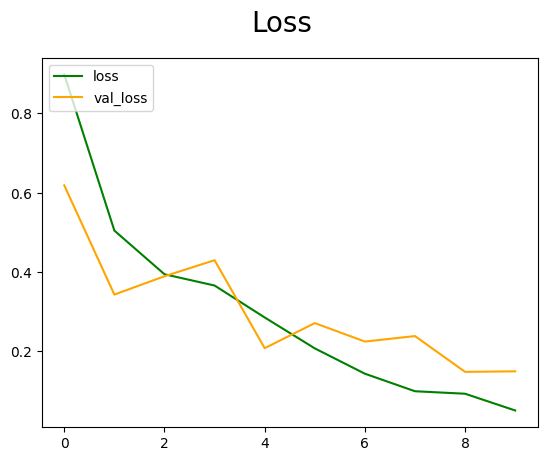

In [37]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'green', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle('Loss', fontsize = 20)
plt.legend(loc = "upper left")
plt.show()

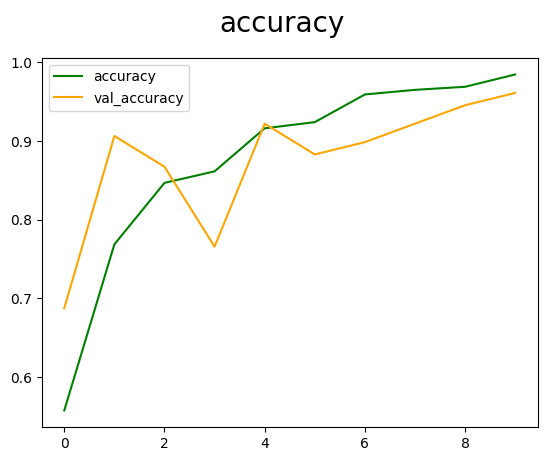

In [38]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color = 'green', label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color = 'orange', label = 'val_accuracy')
fig.suptitle('accuracy', fontsize = 20)
plt.legend(loc = "upper left")
plt.show()

In [39]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [67]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [68]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 90ms/step


In [69]:
print(f'Precision:{pre.result().numpy()},Recall:{re.result().numpy()}. Accuracy:{acc.result().numpy()}')

Precision:0.9736841917037964,Recall:0.9367088675498962. Accuracy:0.9542483687400818


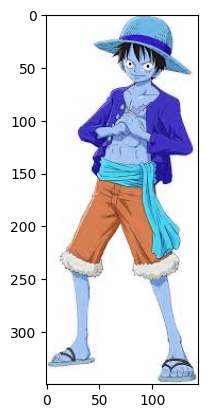

1/1 [==============================] - 0s 23ms/step
Its luffy [[0.7236283]] %


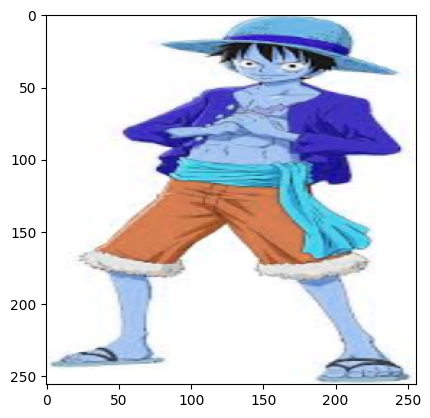

In [71]:
def try_1(image_path, model):
    img = cv2.imread(image_path)
    plt.imshow(img)
    plt.show()
    
    resize = tf.image.resize(img, (256,256))
    
    plt.imshow(resize.numpy().astype(int))
    np.expand_dims(resize, 0).shape
    
    yhat = model.predict(np.expand_dims(resize/255,0))
    
    if yhat<0.5:
        print("its Trafalgar law",yhat,"%")
    else:
        print("Its luffy", yhat,"%")

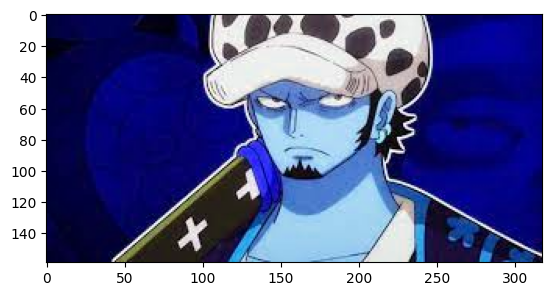

1/1 [==============================] - 0s 25ms/step
its Trafalgar law [[0.00016293]] %


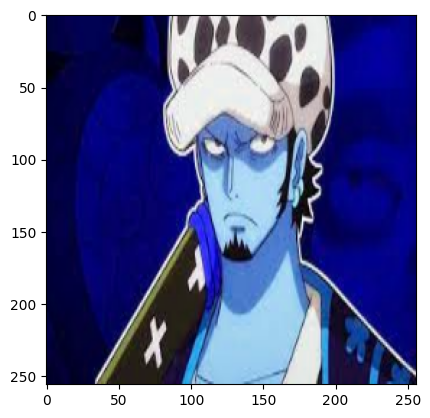

In [74]:
try_1('law.jfif', model)

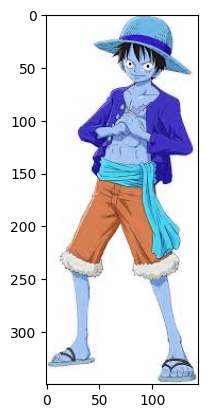

1/1 [==============================] - 0s 24ms/step
Its luffy [[0.7236283]] %


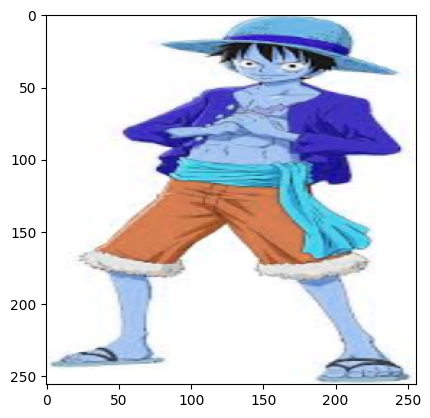

In [77]:
try_1('luffy.jfif', model)